In [1]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [2]:
# Eye ball the imported dataset

### Check dimension of dataset

In [4]:
diabetes_df = pd.read_csv("diabetes.csv")
print(diabetes_df.shape)

(768, 9)


### Check distribution of dependent variable, Outcome and plot it (1 Marks)

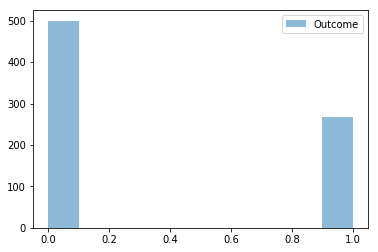

In [5]:
plt.hist(diabetes_df["Outcome"],  alpha=0.5, label=str("Outcome"))
plt.legend(loc='upper right')
plt.show()

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [6]:
print("Below are the count of 0's and 1's int the Outcome column, where 1 mean a diabetic case whereas 0 mean non diabetic case.")
print(diabetes_df["Outcome"].value_counts())

Below are the count of 0's and 1's int the Outcome column, where 1 mean a diabetic case whereas 0 mean non diabetic case.
0    500
1    268
Name: Outcome, dtype: int64


In [7]:
# Check data types and info of dataset
print(diabetes_df.info())
print("The data type of the columns are::")
print(diabetes_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
The data type of the columns are::
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### Check data distribution using summary statistics and provide your findings(2 Marks)

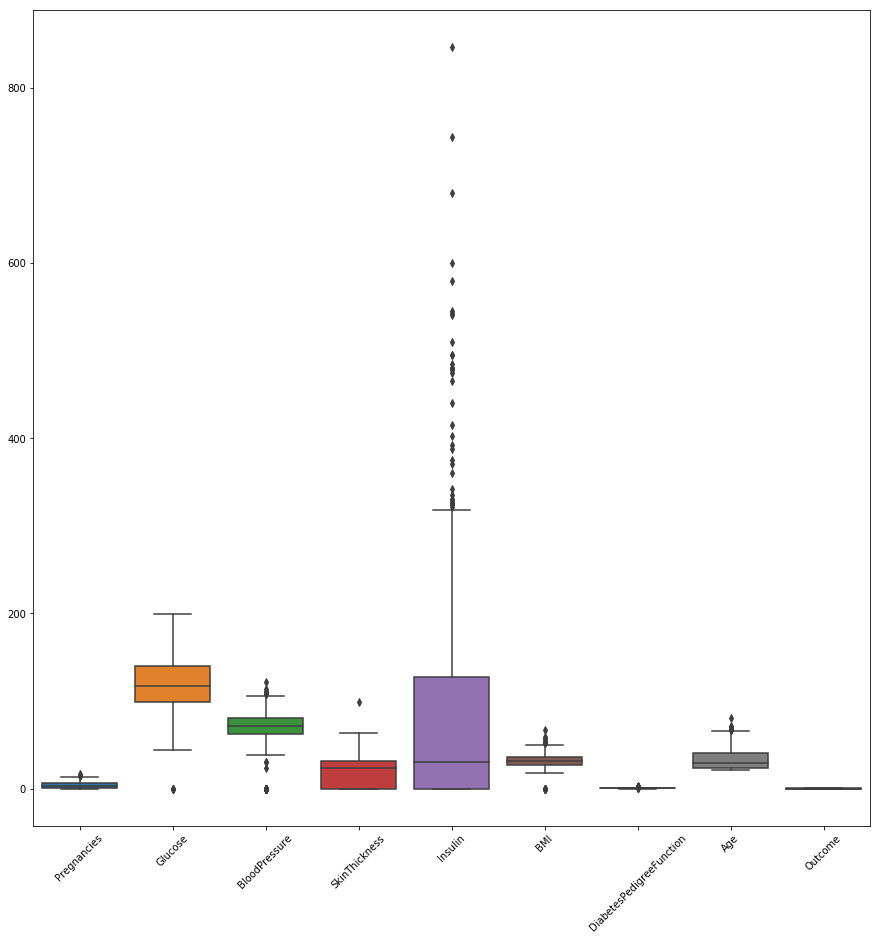

In [8]:
plt.figure(figsize=(15,15))
ax = sns.boxplot( data=diabetes_df)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()
#From the below box plot it is observed that there are many outlying data point for Insulin.
#But the domain expertise suggests that these values correspond to the surge in Insulin level for the diabetic case. 
#Hence, these values cannot be treated as outliers.

### Do correlation analysis and bivariate viualization with Insights(1 Marks)

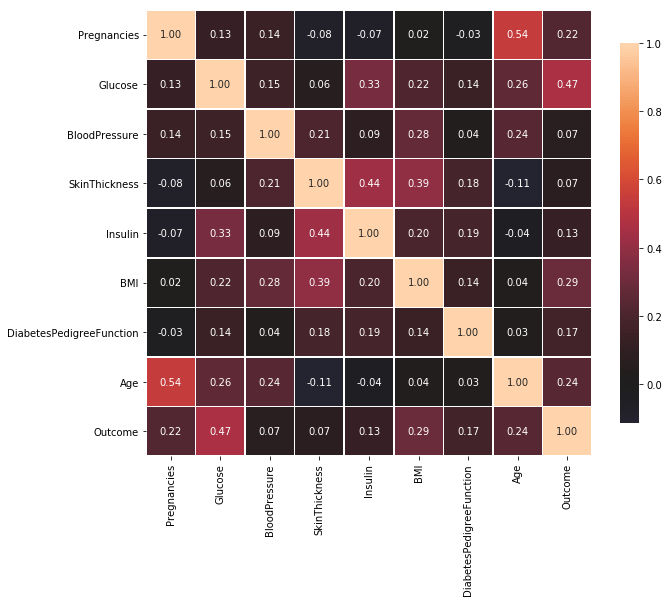

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_df.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [10]:
#Below is the correlation matrix 
corr_matrix = diabetes_df.corr().abs()
print(corr_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282       0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness                0.081672  0.057328       0.207371       1.000000   
Insulin                      0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction     0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528       0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.073535  0.017683                  0.033523   
Glucose                   0.331357  0.221

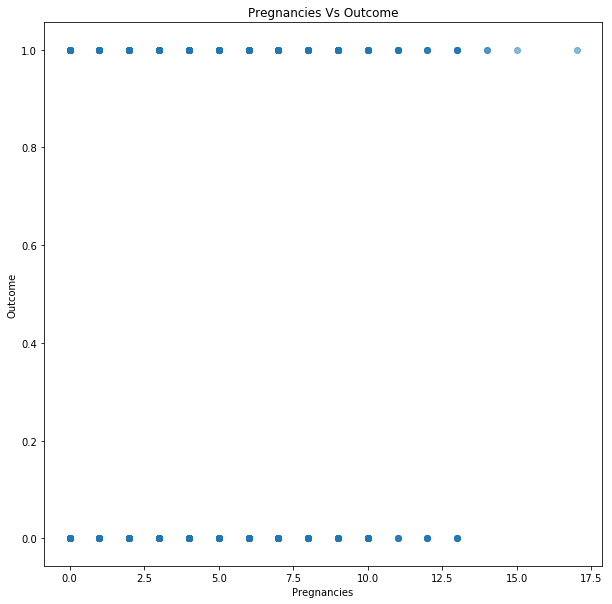

In [11]:
#Bivariate analysis of Pregnancies and Outcome. From the below distribution plot we can say that in some pregnancy cases it is found that the person is also diabetic.
plt.figure(figsize=(10,10))
plt.scatter(diabetes_df["Pregnancies"], diabetes_df["Outcome"], alpha=0.5)
plt.title('Pregnancies Vs Outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')
plt.show()

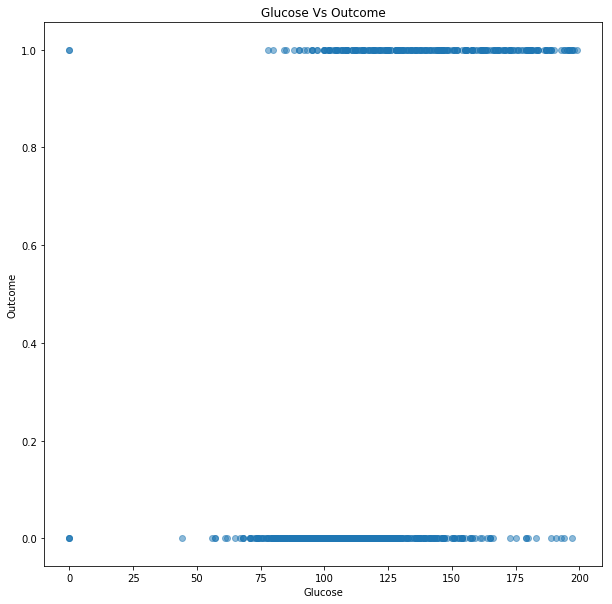

In [12]:
#Bivariate analysis of Glucose and Outcome. From the below plot it can be inferred that high level of glucose is an important attribute in suffering from diabetes.
plt.figure(figsize=(10,10))
plt.scatter(diabetes_df["Glucose"], diabetes_df["Outcome"], alpha=0.5)
plt.title('Glucose Vs Outcome')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

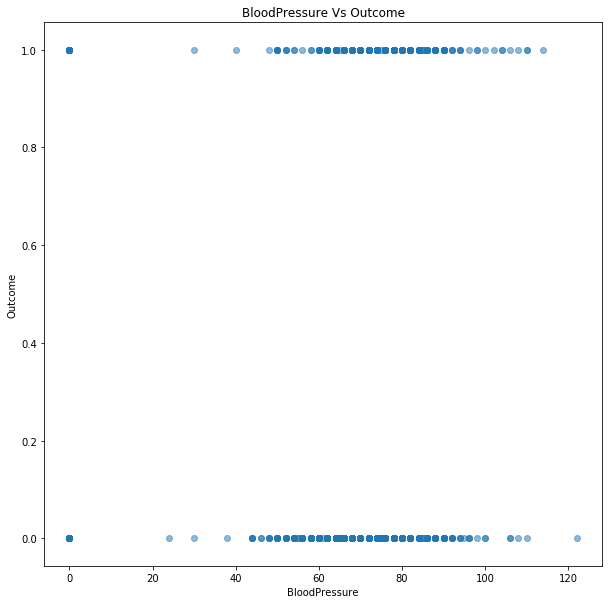

In [13]:
# Bivariate analysis of Blood Pressure and Outcome. From the below plot it can be inferred that Blood Pressure is not an important attribute in determining diabetes.
plt.figure(figsize=(10,10))
plt.scatter(diabetes_df["BloodPressure"], diabetes_df["Outcome"], alpha=0.5)
plt.title('BloodPressure Vs Outcome')
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.show()

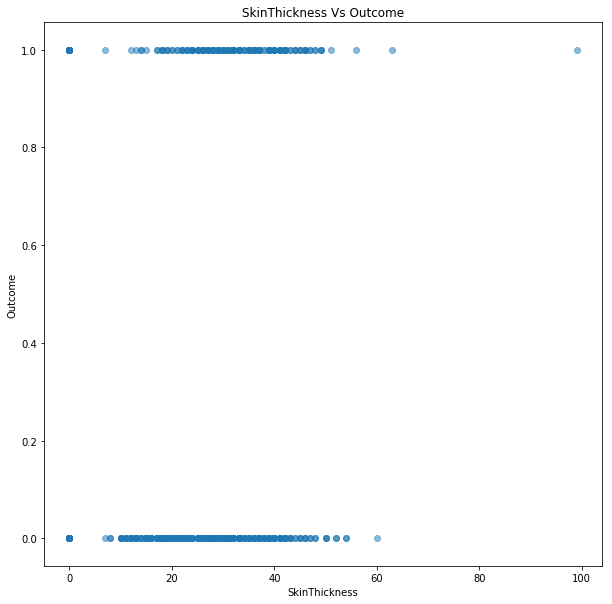

In [14]:
# Bivariate analysis of SkingThickness and Outcome. From the below plot it can be concluded that skin thickness is not an important feature in determining diabetes.
plt.figure(figsize=(10,10))
plt.scatter(diabetes_df["SkinThickness"], diabetes_df["Outcome"], alpha=0.5)
plt.title('SkinThickness Vs Outcome')
plt.xlabel('SkinThickness')
plt.ylabel('Outcome')
plt.show()

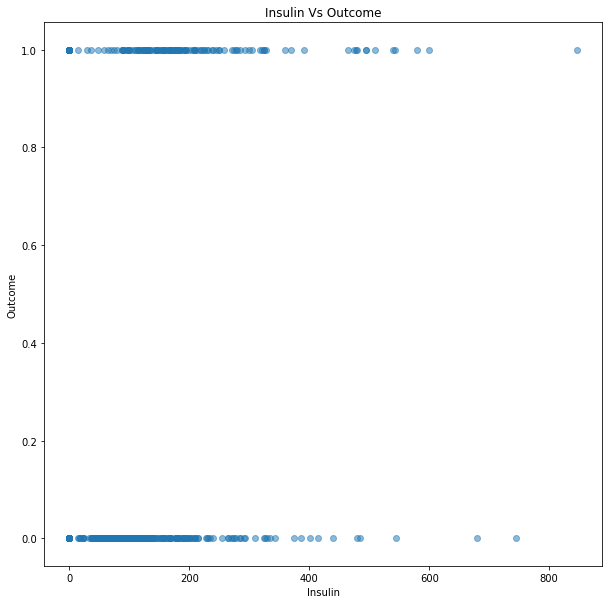

In [15]:
# Bivariate analysis of Insulin and Outcome. From the below plot it can be inferred that for high values of Insulin, there is more chances of suffering from diabetes.
plt.figure(figsize=(10,10))
plt.scatter(diabetes_df["Insulin"], diabetes_df["Outcome"], alpha=0.5)
plt.title('Insulin Vs Outcome')
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.show()


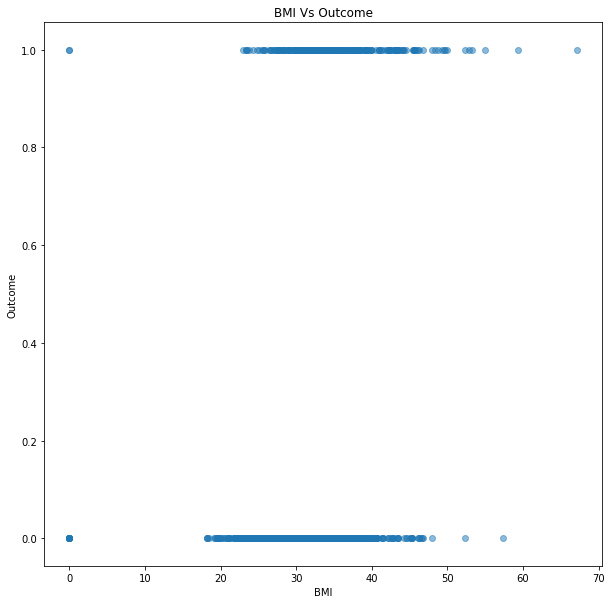

In [16]:
# Bivariate analysis of BMI and Outcome. From the below plot it can be inferred that only in some diabetic cases it is observed that the BMI is high.
plt.figure(figsize=(10,10))
plt.scatter(diabetes_df["BMI"], diabetes_df["Outcome"], alpha=0.5)
plt.title('BMI Vs Outcome')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.show()

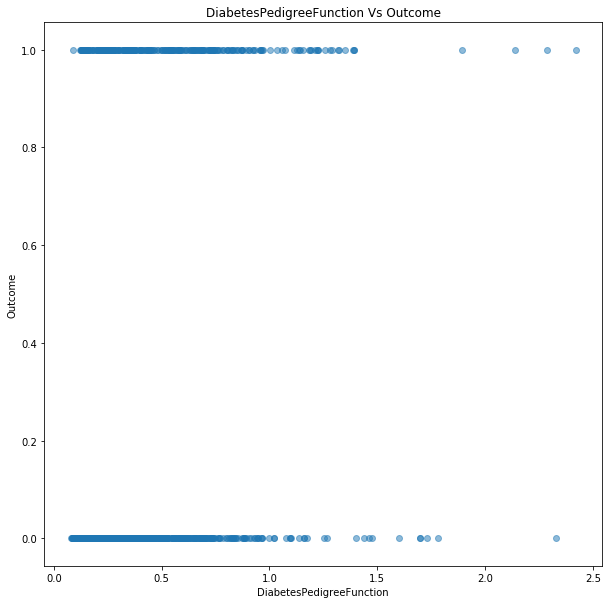

In [17]:
# Bivariate analysis of DiabetesPedigreeFunction and Outcome. From the below plot it is observed that high values of DiabetesPedigreeFunction predict a person being
# diabetic.
plt.figure(figsize=(10,10))
plt.scatter(diabetes_df["DiabetesPedigreeFunction"], diabetes_df["Outcome"], alpha=0.5)
plt.title('DiabetesPedigreeFunction Vs Outcome')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Outcome')
plt.show()

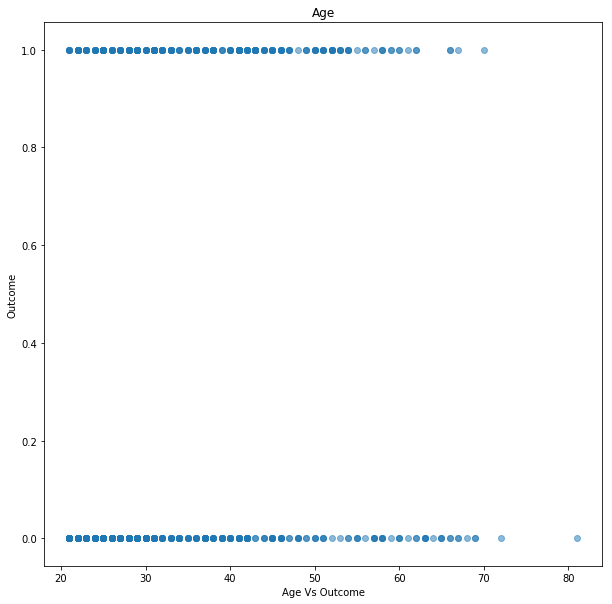

In [18]:
# Bivariate analysis of Age and Outcome. From the below plot it is observed that Age is not an important parameter in being diagonised as diabetic.
plt.figure(figsize=(10,10))
plt.scatter(diabetes_df["Age"], diabetes_df["Outcome"], alpha=0.5)
plt.title('Age')
plt.xlabel('Age Vs Outcome')
plt.ylabel('Outcome')
plt.show()

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [19]:
X = diabetes_df.drop(["Outcome"], axis=1)
y = diabetes_df["Outcome"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Train Support Vector Machine Model(1 Marks)

In [20]:
# use from sklearn.svm import SVC
from sklearn.svm import SVC

In [21]:
# your insights
model = SVC(kernel='linear', C=1)

### Scale the data points using MinMaxScaler ( 1 Marks)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

C:\Users\Anshuman Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [23]:
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [24]:
model = SVC(kernel='linear', C=1000)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [25]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [26]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [27]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [28]:
gs.fit(X_train_scaled, y_train) 

C:\Users\Anshuman Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [29]:
gs.best_estimator_

SVC(C=1.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
gs.best_score_ 

0.7690875232774674